<a href="https://colab.research.google.com/github/salsabilarahmaa/Portofolio/blob/main/SKRIPSI_DBN_RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KLASIFIKASI FINANCIAL DISTRESS PERUSAHAAN PADA INDEKS LQ-45 MENGGUNAKAN DEEP BELIEF NETWORK DENGAN RESTRICTED BOLTZMANN MACHINE**

# Import Dataset Perusahaan LQ-45 Tahun 2019 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import imblearn as imb
import keras as kr
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = pd.read_excel("2019.xlsx")
dataset

,Kode,Nama Saham,FD,CR,EPS,PBV,DAR,DER,ROA,ROE,GPM,OPM,NPM
0,ADRO,Adaro Energy Tbk.,0,96.000000,89.90,0.60,0.390000,0.640000,6.76,0.90488,33.430000,24.640000,3.09
1,AKRA,AKR Corporindo Tbk.,1,39.760000,-20.00,0.80,0.500000,0.028252,-8.00,6.08000,6.600000,3.980000,6.78
2,ANTM,Aneka Tambang Tbk.,1,54.090000,-36.39,0.96,0.400000,0.690000,-2.63,4.43000,3.770000,7.340000,3.46
3,ASII,Astra International Tbk.,0,22.290000,242.05,0.98,0.490000,0.980000,7.94,5.70000,20.220000,12.862007,0.44
4,BBCA,Bank Central Asia Tbk.,0,0.203800,48.68,4.46,0.800000,4.400000,3.03,7.04000,4.850000,57.600000,45.54
5,BBNI,Bank Negara Indonesia (Persero) Tbk.,0,0.295179,805.06,0.58,0.830000,6.080000,0.87,3.67000,0.125568,36.200000,27.88
6,BBRI,Bank Rakyat Indonesia (Persero) Tbk.,0,0.257781,20.69,2.57,0.760000,5.920000,2.50,9.45000,0.158472,77.780000,60.43
7,BBTN,Bank Tabungan Negara (Persero) Tbk.,0,0.237558,265.05,0.06,0.860000,0.060000,0.92,0.78000,0.377111,5.730000,2.29
8,BMRI,Bank Mandiri (Persero) Tbk.,0,0.226278,536.04,0.95,0.780000,5.090000,2.05,3.98000,0.238267,37.020000,28.30
9,BRPT,Barito Pacific Tbk.,1,74.850000,59.03,0.05,0.620000,0.600000,3.44,8.96000,26.090000,-0.296981,-7.87


In [5]:
dataset.shape

(45, 13)

# Analisis Deskriptif

In [6]:
#Mengambil Data CR, EPS, PBV, DAR, DER, ROA, ROE, GPM, OPM
data = dataset.drop(['Kode','Nama Saham','FD'], axis=1, inplace=True)

In [7]:
dataset.head()

,CR,EPS,PBV,DAR,DER,ROA,ROE,GPM,OPM,NPM
0,96.0000,89.90,0.60,0.39,0.640000,6.76,0.90488,33.43,24.640000,3.09
1,39.7600,-20.00,0.80,0.50,0.028252,-8.00,6.08000,6.60,3.980000,6.78
2,54.0900,-36.39,0.96,0.40,0.690000,-2.63,4.43000,3.77,7.340000,3.46
3,22.2900,242.05,0.98,0.49,0.980000,7.94,5.70000,20.22,12.862007,0.44
4,0.2038,48.68,4.46,0.80,4.400000,3.03,7.04000,4.85,57.600000,45.54


In [8]:
dataset.shape

(45, 10)

In [9]:
deskriptif = dataset
deskriptif

,CR,EPS,PBV,DAR,DER,ROA,ROE,GPM,OPM,NPM
0,96.000000,89.90,0.60,0.390000,0.640000,6.76,0.90488,33.430000,24.640000,3.09
1,39.760000,-20.00,0.80,0.500000,0.028252,-8.00,6.08000,6.600000,3.980000,6.78
2,54.090000,-36.39,0.96,0.400000,0.690000,-2.63,4.43000,3.770000,7.340000,3.46
3,22.290000,242.05,0.98,0.490000,0.980000,7.94,5.70000,20.220000,12.862007,0.44
4,0.203800,48.68,4.46,0.800000,4.400000,3.03,7.04000,4.850000,57.600000,45.54
5,0.295179,805.06,0.58,0.830000,6.080000,0.87,3.67000,0.125568,36.200000,27.88
6,0.257781,20.69,2.57,0.760000,5.920000,2.50,9.45000,0.158472,77.780000,60.43
7,0.237558,265.05,0.06,0.860000,0.060000,0.92,0.78000,0.377111,5.730000,2.29
8,0.226278,536.04,0.95,0.780000,5.090000,2.05,3.98000,0.238267,37.020000,28.30
9,74.850000,59.03,0.05,0.620000,0.600000,3.44,8.96000,26.090000,-0.296981,-7.87


In [10]:
deskriptif.describe().T

,count,mean,std,min,25%,50%,75%,max
CR,45.0,1661.426522,10366.984168,0.020000,2.858675,65.80,207.750000,69653.86
EPS,45.0,381.616667,866.210256,-308.470000,25.300000,88.56,305.970000,4049.62
PBV,45.0,2.723333,5.782889,0.040000,0.580000,0.96,3.500000,38.62
DAR,45.0,0.494547,0.222408,0.040000,0.350000,0.50,0.680000,0.86
DER,45.0,1.259261,1.555993,0.028252,0.430000,0.63,1.658501,6.08
ROA,45.0,4.194667,10.447895,-29.050000,0.870000,3.50,7.000000,46.66
ROE,45.0,10.368331,12.965911,-8.430000,3.200000,6.38,20.050000,60.43
GPM,45.0,21.352149,20.341481,0.125568,3.770000,20.09,33.430000,70.73
OPM,45.0,12.737962,17.883121,-2.564926,0.450721,4.65,26.800000,77.78
NPM,45.0,10.360222,14.929973,-7.870000,0.440000,6.76,20.630000,60.43


# Plot Data

<Axes: >

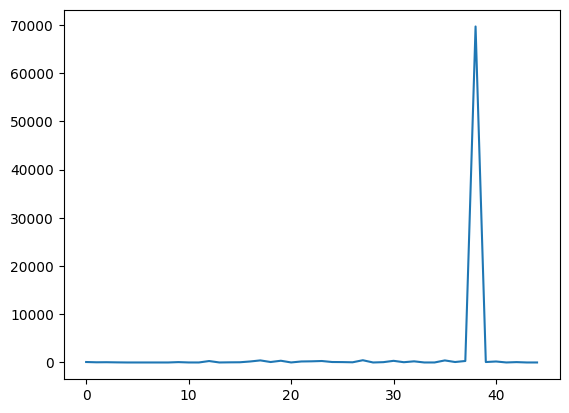

In [11]:
dataset.CR.plot()

<Axes: >

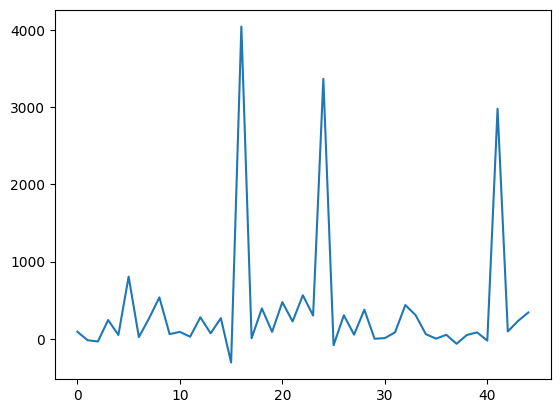

In [12]:
dataset.EPS.plot()

<Axes: >

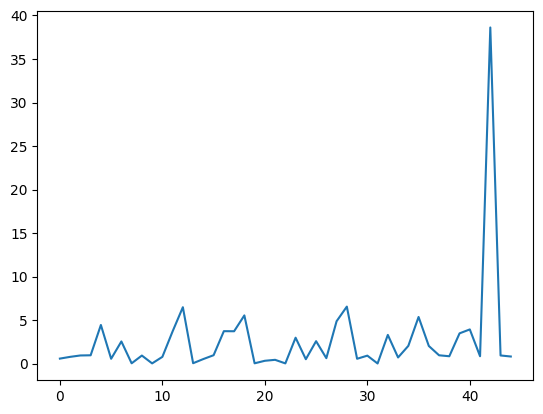

In [13]:
dataset.PBV.plot()

<Axes: >

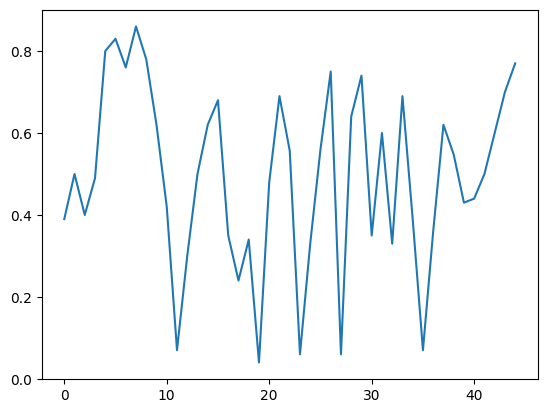

In [14]:
dataset.DAR.plot()

<Axes: >

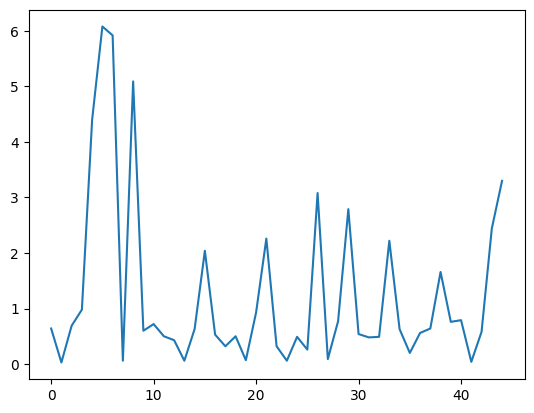

In [15]:
dataset.DER.plot()

<Axes: >

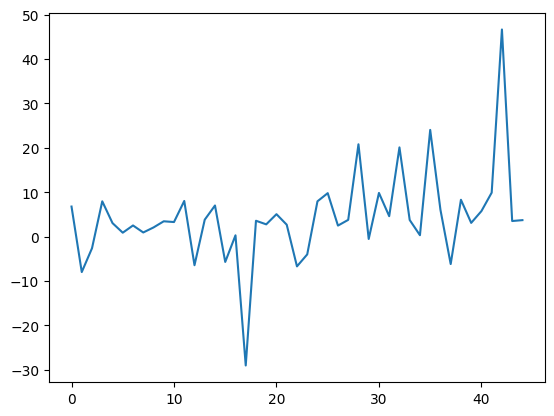

In [16]:
dataset.ROA.plot()

<Axes: >

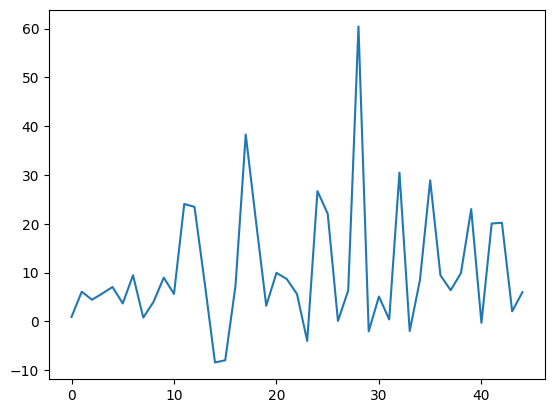

In [17]:
dataset.ROE.plot()

<Axes: >

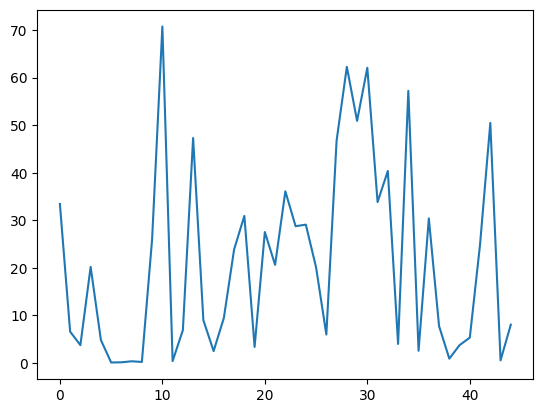

In [18]:
dataset.GPM.plot()

<Axes: >

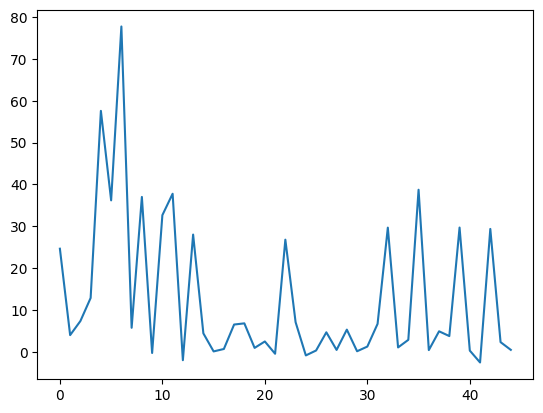

In [19]:
dataset.OPM.plot()

# Normalisasi Data

In [20]:
dataset = pd.read_excel("2019.xlsx")
x = dataset.iloc[:, [3,4,5,6,7,8,9,10,11,12]].values
y = dataset.iloc[:, 2].values

In [21]:
print(x)

[[ 9.60000000e+01  8.99000000e+01  6.00000000e-01  3.90000000e-01
   6.40000000e-01  6.76000000e+00  9.04880025e-01  3.34300000e+01
   2.46400000e+01  3.09000000e+00]
 [ 3.97600000e+01 -2.00000000e+01  8.00000000e-01  5.00000000e-01
   2.82516731e-02 -8.00000000e+00  6.08000000e+00  6.60000000e+00
   3.98000000e+00  6.78000000e+00]
 [ 5.40900000e+01 -3.63900000e+01  9.60000000e-01  4.00000000e-01
   6.90000000e-01 -2.63000000e+00  4.43000000e+00  3.77000000e+00
   7.34000000e+00  3.46000000e+00]
 [ 2.22900000e+01  2.42050000e+02  9.80000000e-01  4.90000000e-01
   9.80000000e-01  7.94000000e+00  5.70000000e+00  2.02200000e+01
   1.28620072e+01  4.40000000e-01]
 [ 2.03800479e-01  4.86800000e+01  4.46000000e+00  8.00000000e-01
   4.40000000e+00  3.03000000e+00  7.04000000e+00  4.85000000e+00
   5.76000000e+01  4.55400000e+01]
 [ 2.95178859e-01  8.05060000e+02  5.80000000e-01  8.30000000e-01
   6.08000000e+00  8.70000000e-01  3.67000000e+00  1.25567585e-01
   3.62000000e+01  2.78800000e+01

In [22]:
print(y)

[0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0]


# Standarisasi Data

In [23]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x=rs.fit_transform(x)

In [24]:
print(x)

[[ 1.47395211e-01  4.77429009e-03 -1.23287671e-01 -3.33333333e-01
   8.14000067e-03  5.31810767e-01 -3.24932936e-01  4.49763992e-01
   7.58654548e-01 -1.81773155e-01]
 [-1.27091764e-01 -3.86788755e-01 -5.47945205e-02  0.00000000e+00
  -4.89823178e-01 -1.87601958e+00 -1.78041543e-02 -4.54821308e-01
  -2.54276412e-02  9.90589401e-04]
 [-5.71522489e-02 -4.45184737e-01  0.00000000e+00 -3.03030303e-01
   4.88400040e-02 -1.00000000e+00 -1.15727003e-01 -5.50236008e-01
   1.02090082e-01 -1.63447251e-01]
 [-2.12356477e-01  5.46869990e-01  6.84931507e-03 -3.03030303e-02
   2.84900023e-01  7.24306688e-01 -4.03560831e-02  4.38300742e-03
   3.11659659e-01 -3.13026251e-01]
 [-3.20151180e-01 -1.42088574e-01  1.19863014e+00  9.09090909e-01
   3.06878025e+00 -7.66721044e-02  3.91691395e-02 -5.13823331e-01
   2.00954269e+00  1.92075285e+00]
 [-3.19705196e-01  2.55282004e+00 -1.30136986e-01  1.00000000e+00
   4.43630037e+00 -4.29037520e-01 -1.60830861e-01 -6.73109657e-01
   1.19737624e+00  1.04606241e+00

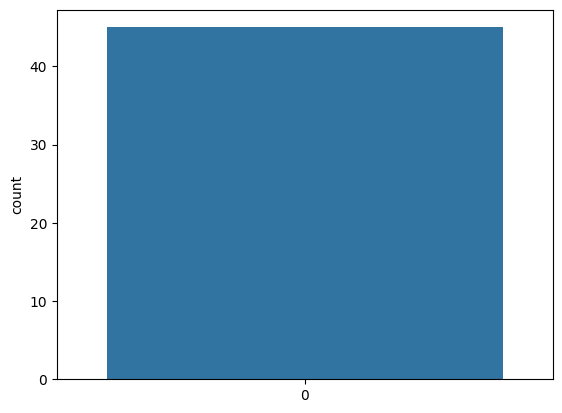

In [25]:
sns.countplot(dataset['FD'])
plt.ioff()

# Balancing Data

In [26]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0,k_neighbors=3)
x_res, y_res = ros.fit_resample(x,y)
print(x_res, y_res)

[[ 1.47395211e-01  4.77429009e-03 -1.23287671e-01 -3.33333333e-01
   8.14000067e-03  5.31810767e-01 -3.24932936e-01  4.49763992e-01
   7.58654548e-01 -1.81773155e-01]
 [-1.27091764e-01 -3.86788755e-01 -5.47945205e-02  0.00000000e+00
  -4.89823178e-01 -1.87601958e+00 -1.78041543e-02 -4.54821308e-01
  -2.54276412e-02  9.90589401e-04]
 [-5.71522489e-02 -4.45184737e-01  0.00000000e+00 -3.03030303e-01
   4.88400040e-02 -1.00000000e+00 -1.15727003e-01 -5.50236008e-01
   1.02090082e-01 -1.63447251e-01]
 [-2.12356477e-01  5.46869990e-01  6.84931507e-03 -3.03030303e-02
   2.84900023e-01  7.24306688e-01 -4.03560831e-02  4.38300742e-03
   3.11659659e-01 -3.13026251e-01]
 [-3.20151180e-01 -1.42088574e-01  1.19863014e+00  9.09090909e-01
   3.06878025e+00 -7.66721044e-02  3.91691395e-02 -5.13823331e-01
   2.00954269e+00  1.92075285e+00]
 [-3.19705196e-01  2.55282004e+00 -1.30136986e-01  1.00000000e+00
   4.43630037e+00 -4.29037520e-01 -1.60830861e-01 -6.73109657e-01
   1.19737624e+00  1.04606241e+00

In [27]:
len(x_res)
len(y_res)

52

# Data Training dan Data Testing

---



In [28]:
from sklearn.model_selection import train_test_split

X = x_res
Y = y_res

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5)
X_train, X_test, Y_train, Y_test

(array([[ 8.53135193e-01,  1.69131008e+00, -3.11643836e-01,
          1.72727273e-01, -2.52340021e-01, -1.66721044e+00,
         -4.62908012e-02,  5.39447067e-01,  8.40630226e-01,
         -7.13224368e-01],
        [-5.71522489e-02, -4.45184737e-01,  0.00000000e+00,
         -3.03030303e-01,  4.88400040e-02, -1.00000000e+00,
         -1.15727003e-01, -5.50236008e-01,  1.02090082e-01,
         -1.63447251e-01],
        [-3.19705196e-01,  2.55282004e+00, -1.30136986e-01,
          1.00000000e+00,  4.43630037e+00, -4.29037520e-01,
         -1.60830861e-01, -6.73109657e-01,  1.19737624e+00,
          1.04606241e+00],
        [-1.24550356e-01, -3.88910704e-01, -5.28034389e-02,
         -1.10112847e-02, -4.70249645e-01, -1.84418744e+00,
         -2.13624003e-02, -4.58288415e-01, -2.07939991e-02,
         -4.98462779e-03],
        [ 3.05599667e-01,  4.97129273e-02,  5.14453247e-01,
          5.68657516e-02,  7.32486476e-02,  4.55360503e-01,
         -6.07571752e-01, -4.42820463e-01, -9.750002

In [29]:
len(X_train)

26

In [30]:
len(X_test)

26

In [31]:
len(Y_train)

26

In [32]:
len(Y_test)

26

# Pembentukan Model

In [33]:
!pip install scipy
!pip install Theano==0.8
!pip install Lasagne
!pip install tabulate==0.7.5
!pip install nolearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Theano: filename=Theano-0.8.0-py3-none-any.whl size=2722133 sha256=4b77d6917c0350851573b9de071663e8a21361b43f4a99eb6f641bee50642039
  Stored in directory: /root/.cache/pip/wheels/4e/74/af/8639943bf8ef894353115b37587fe597a03508f6735b9dc066
Successfully built Theano
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lasagne: filename=Lasagne-0.1-py3-none-any.whl size=79284 sha256=1026ccc4c7bea0fcb6ea41c9d7bd4352b76e8116a7a1321d73fd1d1147b749bb
  Stored in directory: /ro

In [34]:
import nolearn

In [35]:
from sklearn.neural_network import BernoulliRBM
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=0)
X_train, X_test, Y_train, Y_test

(array([[ 6.83289056e-01,  1.41128728e+01,  9.55479452e-01,
         -4.54545455e-01, -8.14000067e-02, -5.25285481e-01,
          5.28189911e-02, -3.57720836e-01, -1.51427296e-01,
         -3.32838039e-01],
        [ 4.92218329e-02, -2.12002885e-01, -1.29759879e-01,
          3.25768189e-01, -8.20621852e-02,  2.05622065e-01,
          3.15038694e-01,  1.60160156e-01, -1.83027593e-01,
         -5.75140951e-01],
        [-2.88787239e-01,  1.37499555e+00, -2.08904110e-01,
         -6.06060606e-02,  2.44200020e-01,  2.51223491e-01,
          2.11275964e-01,  2.51180040e-01, -8.31142301e-02,
          0.00000000e+00],
        [ 1.87127295e-02, -2.27906886e-01, -2.07033234e-01,
          5.73216437e-01,  1.00300762e+00, -3.83989217e-01,
         -2.23475410e-01,  6.84199628e-01, -1.78605365e-01,
         -5.66470906e-01],
        [-3.20041478e-01,  1.59432786e+00, -3.42465753e-03,
          8.48484848e-01,  3.63044030e+00, -2.36541599e-01,
         -1.42433234e-01, -6.69309951e-01,  1.228496

**Model DBN** 

In [37]:
logistic = linear_model.LogisticRegression(C=6000.0,solver="newton-cg", tol=1)
rbm1 = BernoulliRBM(n_components=100, learning_rate=0.06, n_iter=180, verbose=True, random_state=0)
rbm2 = BernoulliRBM(n_components=50, learning_rate=0.06, n_iter=160, verbose=True, random_state=0)
rbm3 = BernoulliRBM(n_components=25, learning_rate=0.06, n_iter=120, verbose=True, random_state=0)
DBN3 = Pipeline(steps=[('rbm1', rbm1),('rbm2', rbm2),('rbm3', rbm3), ('logistic', logistic)])

In [38]:
DBN3.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -21.96, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -63.13, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -112.21, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -163.59, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -217.23, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -270.54, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -324.40, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -379.41, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -434.59, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -489.58, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -543.94, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -599.01, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -653.15, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -709.89, time = 0.00s
[BernoulliRBM] It

Pipeline(steps=[('rbm1',
                 BernoulliRBM(learning_rate=0.06, n_components=100, n_iter=180,
                              random_state=0, verbose=True)),
                ('rbm2',
                 BernoulliRBM(learning_rate=0.06, n_components=50, n_iter=160,
                              random_state=0, verbose=True)),
                ('rbm3',
                 BernoulliRBM(learning_rate=0.06, n_components=25, n_iter=120,
                              random_state=0, verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000.0, solver='newton-cg', tol=1))])

In [39]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        DBN3.predict(X_test))))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.42      1.00      0.59        11

    accuracy                           0.42        26
   macro avg       0.21      0.50      0.30        26
weighted avg       0.18      0.42      0.25        26




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
pred = DBN3.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [41]:
actual = Y_test

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(actual,pred)*100,"%")

42.30769230769231 %


**Model RBM**

In [43]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.3 MB/s eta 0:00:00


In [44]:
#Import Library
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

In [45]:
data = x_res
data

array([[ 1.47395211e-01,  4.77429009e-03, -1.23287671e-01,
        -3.33333333e-01,  8.14000067e-03,  5.31810767e-01,
        -3.24932936e-01,  4.49763992e-01,  7.58654548e-01,
        -1.81773155e-01],
       [-1.27091764e-01, -3.86788755e-01, -5.47945205e-02,
         0.00000000e+00, -4.89823178e-01, -1.87601958e+00,
        -1.78041543e-02, -4.54821308e-01, -2.54276412e-02,
         9.90589401e-04],
       [-5.71522489e-02, -4.45184737e-01,  0.00000000e+00,
        -3.03030303e-01,  4.88400040e-02, -1.00000000e+00,
        -1.15727003e-01, -5.50236008e-01,  1.02090082e-01,
        -1.63447251e-01],
       [-2.12356477e-01,  5.46869990e-01,  6.84931507e-03,
        -3.03030303e-02,  2.84900023e-01,  7.24306688e-01,
        -4.03560831e-02,  4.38300742e-03,  3.11659659e-01,
        -3.13026251e-01],
       [-3.20151180e-01, -1.42088574e-01,  1.19863014e+00,
         9.09090909e-01,  3.06878025e+00, -7.66721044e-02,
         3.91691395e-02, -5.13823331e-01,  2.00954269e+00,
         1.

In [46]:
len(x_res)
len(y_res)

52

In [47]:
new_data = data

In [48]:
# Split Dataset to training_set and test_set 
from sklearn.model_selection import train_test_split
training_set,test_set = train_test_split(new_data,test_size=0.5)

In [49]:
training_set

array([[ 1.16124975e+00,  7.54373463e-01,  6.98630137e-01,
        -1.33333333e+00, -4.63980038e-01, -1.22675367e+00,
        -6.17210682e-01,  2.92312879e-01,  9.18431218e-02,
         3.86329866e-02],
       [ 4.92218329e-02, -2.12002885e-01, -1.29759879e-01,
         3.25768189e-01, -8.20621852e-02,  2.05622065e-01,
         3.15038694e-01,  1.60160156e-01, -1.83027593e-01,
        -5.75140951e-01],
       [ 6.92806297e-01,  4.80671251e-01, -1.71232877e-01,
         5.75757576e-01,  1.32682011e+00, -1.35399674e-01,
         1.36498516e-01,  1.85434929e-02, -1.94588962e-01,
        -1.71371966e-01],
       [-1.35681684e-01,  7.65739124e-01, -1.06164384e-01,
         7.57575758e-01,  1.99430016e+00, -1.68026101e-01,
        -3.73887240e-01, -4.75050573e-01,  0.00000000e+00,
        -6.24071322e-02],
       [ 0.00000000e+00, -3.18095985e-01, -1.30136986e-01,
         7.27272727e-01,  1.75824014e+00, -6.59053834e-01,
        -5.00296736e-01,  1.03843560e+00, -1.71886078e-01,
        -4.

In [50]:
len(training_set)

26

In [51]:
test_set

array([[-3.07193703e-01, -1.06388285e-01,  3.76712329e-01,
        -3.33333333e-01,  0.00000000e+00, -5.22022838e-01,
         1.23442136e-01,  1.25118004e+00, -6.82758936e-02,
         1.64239723e+00],
       [ 6.84265183e-02, -6.17949906e-01,  5.61643836e-01,
         1.81818182e-01, -3.01180025e-01,  1.02446982e+00,
         9.30563798e-01,  0.00000000e+00, -1.65089909e-01,
        -6.93412580e-03],
       [-3.20041478e-01,  1.59432786e+00, -3.42465753e-03,
         8.48484848e-01,  3.63044030e+00, -2.36541599e-01,
        -1.42433234e-01, -6.69309951e-01,  1.22849663e+00,
         1.06686478e+00],
       [-1.24550356e-01, -3.88910704e-01, -5.28034389e-02,
        -1.10112847e-02, -4.70249645e-01, -1.84418744e+00,
        -2.13624003e-02, -4.58288415e-01, -2.07939991e-02,
        -4.98462779e-03],
       [ 1.77850380e+00, -2.92763744e-01,  9.52054795e-01,
        -7.87878788e-01, -2.52340021e-01, -5.30995106e+00,
         1.89376855e+00,  1.27781524e-01,  7.05203607e-02,
        -4.

In [52]:
len(test_set)

26

In [53]:
#take max id_saham in train and test data
nb_saham = int(max(max(training_set[:, 5]+(7-1)), max(test_set[:, 5]+(7-1))))

In [54]:
# number of saham
nb_saham

13

In [55]:
# Change to tensor data from array
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [56]:
training_set

tensor([[ 1.1612e+00,  7.5437e-01,  6.9863e-01, -1.3333e+00, -4.6398e-01,
         -1.2268e+00, -6.1721e-01,  2.9231e-01,  9.1843e-02,  3.8633e-02],
        [ 4.9222e-02, -2.1200e-01, -1.2976e-01,  3.2577e-01, -8.2062e-02,
          2.0562e-01,  3.1504e-01,  1.6016e-01, -1.8303e-01, -5.7514e-01],
        [ 6.9281e-01,  4.8067e-01, -1.7123e-01,  5.7576e-01,  1.3268e+00,
         -1.3540e-01,  1.3650e-01,  1.8543e-02, -1.9459e-01, -1.7137e-01],
        [-1.3568e-01,  7.6574e-01, -1.0616e-01,  7.5758e-01,  1.9943e+00,
         -1.6803e-01, -3.7389e-01, -4.7505e-01,  0.0000e+00, -6.2407e-02],
        [ 0.0000e+00, -3.1810e-01, -1.3014e-01,  7.2727e-01,  1.7582e+00,
         -6.5905e-01, -5.0030e-01,  1.0384e+00, -1.7189e-01, -4.5022e-01],
        [ 1.1844e+00, -5.5079e-01,  6.8493e-03,  3.6364e-01,  8.1400e-03,
         -1.5824e+00,  0.0000e+00, -4.1537e-01,  9.1084e-03,  6.5379e-02],
        [-3.1989e-01, -2.4181e-01,  5.5137e-01,  7.8788e-01,  4.3061e+00,
         -1.6313e-01,  1.8220e-0

In [57]:
test_set

tensor([[-3.0719e-01, -1.0639e-01,  3.7671e-01, -3.3333e-01,  0.0000e+00,
         -5.2202e-01,  1.2344e-01,  1.2512e+00, -6.8276e-02,  1.6424e+00],
        [ 6.8427e-02, -6.1795e-01,  5.6164e-01,  1.8182e-01, -3.0118e-01,
          1.0245e+00,  9.3056e-01,  0.0000e+00, -1.6509e-01, -6.9341e-03],
        [-3.2004e-01,  1.5943e+00, -3.4247e-03,  8.4848e-01,  3.6304e+00,
         -2.3654e-01, -1.4243e-01, -6.6931e-01,  1.2285e+00,  1.0669e+00],
        [-1.2455e-01, -3.8891e-01, -5.2803e-02, -1.1011e-02, -4.7025e-01,
         -1.8442e+00, -2.1362e-02, -4.5829e-01, -2.0794e-02, -4.9846e-03],
        [ 1.7785e+00, -2.9276e-01,  9.5205e-01, -7.8788e-01, -2.5234e-01,
         -5.3100e+00,  1.8938e+00,  1.2778e-01,  7.0520e-02, -4.6756e-01],
        [ 3.3963e+02, -1.4551e-01, -3.0822e-02,  1.4432e-01,  8.3720e-01,
          7.8140e-01,  2.0831e-01, -6.4599e-01, -3.4157e-02,  8.1773e-01],
        [-3.1434e-01,  5.0408e-01,  0.0000e+00,  6.0606e-01,  1.4733e+00,
          0.0000e+00, -2.5757e-0

In [58]:
# Normalize data from 0 to 1
training_set[training_set <= 0] = 0
training_set[training_set >= 1] = 1

test_set[test_set <= 0] = 0
test_set[test_set >= 1] = 1

In [59]:
training_set

tensor([[1.0000, 0.7544, 0.6986, 0.0000, 0.0000, 0.0000, 0.0000, 0.2923, 0.0918,
         0.0386],
        [0.0492, 0.0000, 0.0000, 0.3258, 0.0000, 0.2056, 0.3150, 0.1602, 0.0000,
         0.0000],
        [0.6928, 0.4807, 0.0000, 0.5758, 1.0000, 0.0000, 0.1365, 0.0185, 0.0000,
         0.0000],
        [0.0000, 0.7657, 0.0000, 0.7576, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.7273, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000],
        [1.0000, 0.0000, 0.0068, 0.3636, 0.0081, 0.0000, 0.0000, 0.0000, 0.0091,
         0.0654],
        [0.0000, 0.0000, 0.5514, 0.7879, 1.0000, 0.0000, 0.1822, 0.0000, 1.0000,
         1.0000],
        [0.0000, 0.6288, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0410,
         0.0000],
        [1.0000, 0.6740, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
         0.0832],
        [0.0000, 0.0000, 1.0000, 0.9091, 1.0000, 0.0000, 0.0392, 0.0000, 1.0000,
         1.0000],
        [0

In [60]:
test_set

tensor([[0.0000e+00, 0.0000e+00, 3.7671e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.2344e-01, 1.0000e+00, 0.0000e+00, 1.0000e+00],
        [6.8427e-02, 0.0000e+00, 5.6164e-01, 1.8182e-01, 0.0000e+00, 1.0000e+00,
         9.3056e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 8.4848e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 9.5205e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 1.2778e-01, 7.0520e-02, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4432e-01, 8.3720e-01, 7.8140e-01,
         2.0831e-01, 0.0000e+00, 0.0000e+00, 8.1773e-01],
        [0.0000e+00, 5.0408e-01, 0.0000e+00, 6.0606e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.3971e-01, 1.0000

**Arsitektur RBM Model 1**

In [61]:
class RBM():
    def __init__(self, nv, nh):
        ##initialize all weights 
        ##a tensor with size of nh, nv in normal dis mean 0 var 1
        self.W = torch.randn(nh, nv)
        #bias for hidden nodes
        #1st dimension is batch, 2nd is num of hidden nodes
        self.a = torch.randn(1, nh)
        #bias for visible nodes
        self.b = torch.randn(1, nv)
    #activate the hidden nodes by sampling all hiddens node, given values of visible nodes 
    def sample_h(self, x):
        #x is values of visible nodes
        #probablity of hiddens h to be activated, given values of visible  nodes v
        wx = torch.mm(x, self.W.t())
        #use sigmoid fuc to activate visible node
        ## a is bias for hidden nodes
        activation = wx + self.a.expand_as(wx)
        ##ith of the vector is the probability of ith hidden nodes to be activated, 
        ##given visible values
        p_h_given_v =torch.sigmoid(activation)
        #samples of all hiddens nodes
        return p_h_given_v, torch.bernoulli(p_h_given_v)
    def sample_v(self, y):
        #y is hidden nodes
        #probablity of visible h to be activated, given hidden  nodes v
        wy = torch.mm(y, self.W)
        #use sigmoid fuc to activate hiddens nodes
        activation = wy + self.b.expand_as(wy)
        ##ith of the vector is the probability of ith visible nodes to be activated, 
        ##given hidden values
        p_v_given_h =torch.sigmoid(activation)
        #samples of all hiddens nodes
        return p_v_given_h, torch.bernoulli(p_v_given_h)
        
    #visible nodes after kth interation
    #probablity of hidden nodes after kth iteration
    def train(self, v0, vk, ph0, phk):
#         self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
#         self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        #add zero to keep b as a tensor of 2 dimension
        self.b += torch.sum((v0 - vk), 0)
        self.a += torch.sum((ph0 - phk), 0)

In [62]:
#number of visible node=10
nv = len(training_set[0])
#number of hidden nodes or num of features
nh = 100
batch_size = nb_saham-1
rbm = RBM(nv, nh)

In [63]:
nv

10

In [64]:
nh

100

In [65]:
batch_size

12

In [66]:
rbm

**Model Training RBM untuk epoch 5**

In [67]:
nb_epoch = 5
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+'loss: '+str(train_loss/s))

epoch: 1loss: tensor(0.3632)
epoch: 2loss: tensor(0.4067)
epoch: 3loss: tensor(0.5845)
epoch: 4loss: tensor(0.5500)
epoch: 5loss: tensor(0.4121)


**Test RBM untuk epoch 5**

In [68]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [69]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

ZeroDivisionError: ignored

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 10**

In [ ]:
nb_epoch = 10
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 10**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 15**

In [ ]:
nb_epoch = 15
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 15**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 20**

In [ ]:
nb_epoch = 20
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 20**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 25**

In [ ]:
nb_epoch = 25
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 25**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 30**

In [ ]:
nb_epoch = 30
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 30**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 35**

In [ ]:
nb_epoch = 35
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 35**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 40**

In [ ]:
nb_epoch = 40
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 40**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 45**

In [ ]:
nb_epoch = 45
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 45**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk epoch 50**

In [ ]:
nb_epoch = 50
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 50**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Percentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk Epoch 55**

In [ ]:
nb_epoch = 55
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 55**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk Epoch 60**

In [ ]:
nb_epoch = 60
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 60**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk Epoch 65**

In [ ]:
nb_epoch = 65
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 65**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk Epoch 70**

In [ ]:
nb_epoch = 70
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 70**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training RBM untuk Epoch 75**

In [ ]:
nb_epoch = 75
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 75**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training untuk Epoch 80**

In [ ]:
nb_epoch = 80
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 80**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training untuk Epoch 85**

In [ ]:
nb_epoch = 85
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 85**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training untuk Epoch 90**

In [ ]:
nb_epoch = 90
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 90**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training untuk Epoch 95**

In [ ]:
nb_epoch = 95
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 95**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)

**Model Training untuk Epoch 100**

In [ ]:
nb_epoch = 100
for epoch in range(1, nb_epoch+1):
    ##loss function
    train_loss = 0
    #normalize the loss, define a counter
    s = 0.
    #implement a batch learning, 
    for id_saham in range(0, nb_saham - batch_size, 10):
        #input batch values
        vk = training_set[id_saham: id_saham+batch_size]
        #target used for loss mesarue: data 
        v0 = training_set[id_saham: id_saham+batch_size]
        ##initilize probablity
        #pho: given real rating at begining, probablity of hidden nodes
        ph0, _ = rbm.sample_h(v0)
        #k step of constrative divergence
        for k in range(10):
            _, hk = rbm.sample_h(vk)
            _, vk = rbm.sample_v(hk)
            #training on rating that do exist, rating as -1
            vk[v0<0] = v0[v0<0]
        phk, _ = rbm.sample_h(vk)
        #update weights and bias
        rbm.train(v0, vk, ph0, phk)
        #update train loss
        train_loss += torch.mean(torch.abs(v0[v0>0]-vk[v0>0]))
        s += 1
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

**Test RBM untuk epoch 100**

In [ ]:
##loss function test
test_loss = 0
test_loss1 = 0
#normalize the loss, define a counter
s = 0.
#implement a batch learning, 
for id_saham in range(0,nb_saham-len(test_set)):
    #use input of train set to activate RBM
    v_input = training_set[id_saham: id_saham+1]
    #target used for loss mesarue:  
    v_target = test_set[id_saham: id_saham+1]
    #use only 1 step to make better prediction, though used 10 steps to train
    if len(v_target[v_target>=0]):
        _, h = rbm.sample_h(v_input) 
        _, v_input = rbm.sample_v(h)
        #update test loss
        test_loss += torch.mean(torch.abs(v_target[v_target>0]-v_input[v_target>0]))
        test_loss1 += torch.mean(torch.square(v_target[v_target>0]-v_input[v_target>0]))
        s += 1.

In [ ]:
print('Mean Absolute Precentage Error: ' +str((test_loss/s)))

In [ ]:
from torchmetrics import ConfusionMatrix
target = torch.tensor(v_target,dtype=torch.int64)
preds = torch.tensor(v_input,dtype=torch.int64)
confmat = ConfusionMatrix(num_classes=2)
print('Confusing Matrix:')
confmat(preds, target)